In [1]:
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/KU-DIC/LG_time_series_day07.git

Cloning into 'LG_time_series_day07'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [3]:
# import dataset

data = pd.read_csv('/content/LG_time_series_day07/Data_XGBoost_wafer_sensor_classification.csv')

del data['Unnamed: 0']
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,y
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,612.0,601.0,599.0,601.0,602.0,603.0,602.0,604.0,603.0,602.0,602.0,602.0,602.0,603.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-102.0,-101.0,-100.0,-99.0,-97.0,-98.0,-98.0,-98.0,-98.0,-98.0,-98.0,-97.0,-97.0,-97.0,-97.0,-97.0,-97.0,-97.0,-98.0,-97.0,-97.0,9.436896e-16,0.0,-1.000000e+00,6.505213e-18,1.517883e-18,-2.710505e-20,0.000000e+00,0.000000e+00,0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,617.0,608.0,602.0,602.0,602.0,601.0,603.0,603.0,602.0,603.0,604.0,603.0,603.0,603.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-100.0,-99.0,-97.0,-96.0,-97.0,-97.0,-97.0,-97.0,-97.0,-97.0,-97.0,-96.0,-96.0,-96.0,-96.0,-97.0,-96.0,-96.0,-96.0,-9.600000e+01,-6.0,6.938894e-17,5.551115e-17,-1.000000e+00,-1.734723e-18,-2.059984e-18,1.084202e-19,0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,622.0,605.0,601.0,603.0,602.0,603.0,603.0,602.0,604.0,603.0,602.0,601.0,602.0,29.0,3.0,2.0,2.0,2.0,2.0,2.0,...,-102.0,-102.0,-102.0,-102.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-101.0,-100.0,-98.0,-96.0,-96.0,-97.0,-97.0,-97.0,-97.0,-96.0,-97.0,-97.0,-97.0,-96.0,-97.0,-97.0,-97.0,-97.0,-97.0,-97.0,-3.774758e-15,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.551115e-17,-1.000000e+00,0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,596.0,609.0,604.0,602.0,603.0,603.0,602.0,603.0,604.0,602.0,601.0,603.0,603.0,29.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,-120.0,-120.0,-120.0,-120.0,-120.0,-120.0,-120.0,-120.0,-121.0,-121.0,-120.0,-121.0,-120.0,-121.0,-120.0,-120.0,-118.0,-117.0,-117.0,-116.0,-116.0,-116.0,-117.0,-117.0,-117.0,-117.0,-116.0,-116.0,-116.0,-116.0,-116.0,-1.160000e+02,-116.0,-1.160000e+02,-1.160000e+02,-2.000000e+00,-1.000000e+00,1.387779e-17,-3.469447e-18,0
4,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,609.0,604.0,602.0,602.0,603.0,603.0,603.0,603.0,602.0,602.0,604.0,603.0,603.0,28.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,-119.0,-119.0,-119.0,-119.0,-119.0,-119.0,-119.0,-120.0,-120.0,-119.0,-120.0,-120.0,-120.0,-120.0,-120.0,-120.0,-120.0,-119.0,-118.0,-116.0,-114.0,-114.0,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-1.150000e+02,-115.0,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,-1.150000e+02,0


In [4]:
from sklearn.model_selection import train_test_split

# split train and test data (test ratio: 30%)
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 0:720], data.iloc[:,720], test_size = 0.3)

## XGboost
#### 파라미터 참조 : https://xgboost.readthedocs.io/en/stable/parameter.html

In [5]:
from xgboost import XGBClassifier

# model define
model_XG = XGBClassifier(n_estimators = 100, use_label_encoder=False, objective = "binary:logistic", max_depth = 3)

# model train
model_XG.fit(X_train, Y_train)

# predict
pred = model_XG.predict(X_test)

# print results
print("XGboost")
print(pd.crosstab(Y_test, pred, margins = True, rownames = ["real"], colnames = ["pred"]))

XGboost
pred    0   1  All
real              
0     320   0  320
1       9  26   35
All   329  26  355


## Time Importance (Top10)

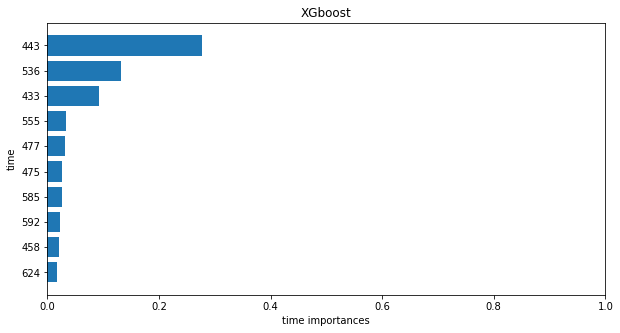

In [7]:
# visualie the time importance

plt.figure(figsize = (10, 5))

plt.title("XGboost")
fi = model_XG.feature_importances_
idx = (-fi).argsort()[0:10]
fi = fi[idx]
plt.barh(range(10), fi[::-1], align='center')
plt.xlim(0, 1)
plt.yticks(range(10), idx[::-1])
plt.xlabel('time importances', size=10)
plt.ylabel('time', size=10)

plt.show() 